<a href="https://colab.research.google.com/github/abd-04/CNN_cifar10/blob/main/NN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lib import


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Class names for labels
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

(50000, 32, 32, 3) → the whole dataset

(32, 32, 3) → one image

(32, 3) → one row of pixels from that image

(3,) → one pixel (R, G, B)

In [3]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()   #its alr split as 50k images for the training and 10k for the testing(83% and 17%)
X_train,X_validation,Y_train,Y_validation=train_test_split(X_train,Y_train,test_size=0.1, random_state=42)

print("Training set:", X_train.shape)
print("Validation set:", X_validation.shape)
print("Test set:", X_test.shape)




170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Training set: (45000, 32, 32, 3)
Validation set: (5000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


In [4]:
#normalization
X_train=X_train/255.0
X_test=X_test/255.0
X_validation=X_validation/255.0



In [5]:
# Flatten and cast to int
Y_train = Y_train.reshape(-1).astype(int)   # (45000,)
Y_validation   = Y_validation.reshape(-1).astype(int)     # (5000,)
Y_test  = Y_test.reshape(-1).astype(int)    # (10000,)

# One-hot encode
classes = 10
Y_train = np.eye(classes)[Y_train]   # (45000, 10)
Y_validation= np.eye(classes)[Y_validation]     # (5000, 10)
Y_test  = np.eye(classes)[Y_test]    # (10000, 10)

print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_validation.shape)
print("Y_test shape:", Y_test.shape)


Y_train shape: (45000, 10)
Y_val shape: (5000, 10)
Y_test shape: (10000, 10)


In [14]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.08,
    height_shift_range=0.08,
    horizontal_flip=True
)

datagen.fit(X_train)


In [13]:
model = Sequential([

    # ---------------- Conv Block 1 ----------------
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # ---------------- Conv Block 2 ----------------
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # ---------------- Conv Block 3 ----------------
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),

    # ---------------- Classifier ----------------
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    Dropout(0.5),                     # added dropout
    Dense(10, activation='softmax')   # output layer
])


In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,144,138 (4.36 MB)

 Trainable params: 1,143,690 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=40,
    validation_data=(X_validation, Y_validation),
    callbacks=[early_stop]
)



Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.2659 - loss: 2.2165 - val_accuracy: 0.3644 - val_loss: 1.8548
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.4437 - loss: 1.6558 - val_accuracy: 0.4746 - val_loss: 1.7101
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.5286 - loss: 1.4913 - val_accuracy: 0.6422 - val_loss: 1.2143
Epoch 4/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.5922 - loss: 1.3730 - val_accuracy: 0.6428 - val_loss: 1.2720
Epoch 5/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.6249 - loss: 1.3141 - val_accuracy: 0.6656 - val_loss: 1.1913
Epoch 6/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.6550 - loss: 1.2449 - val_accuracy: 0.6814 - val_loss: 1.1558
Epoch 7/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.6743 - loss: 1.2117 - val_accuracy: 0.7198 - val_loss: 1.0788
Epoch 8/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.6886 -

In [17]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Final Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7550 - loss: 0.9841
Final Test Accuracy: 0.7501999735832214


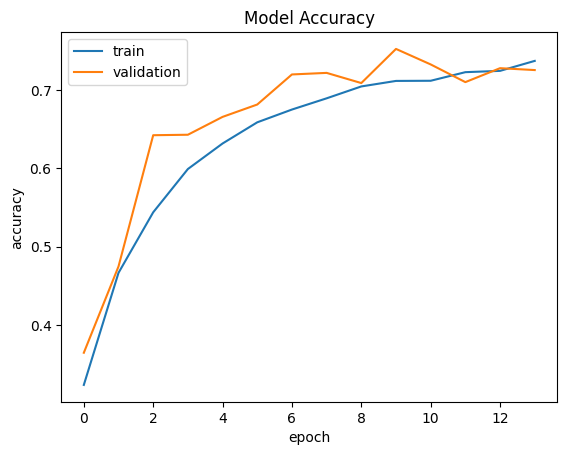

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()


In [19]:
y_pred = model.predict(X_test[:5])
print("Predicted classes:", np.argmax(y_pred, axis=1))
print("True classes:", np.argmax(Y_test[:5], axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
Predicted classes: [3 1 8 0 6]
True classes: [3 8 8 0 6]


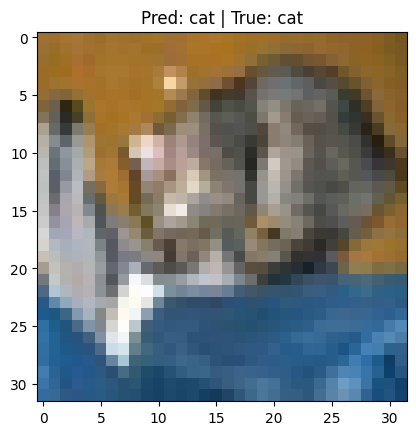

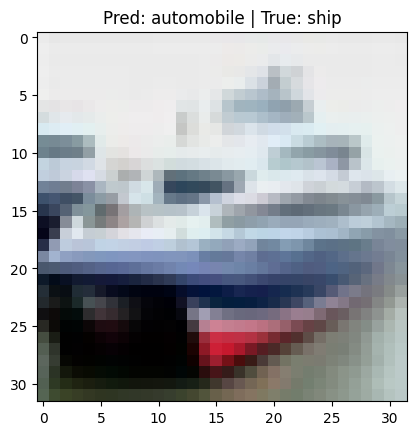

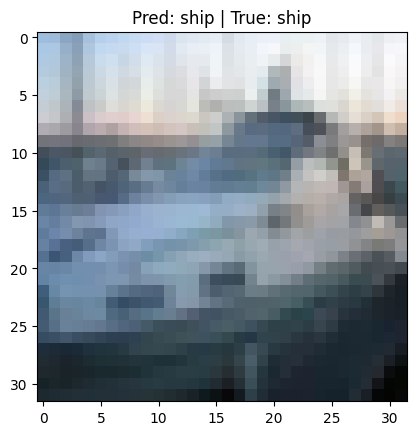

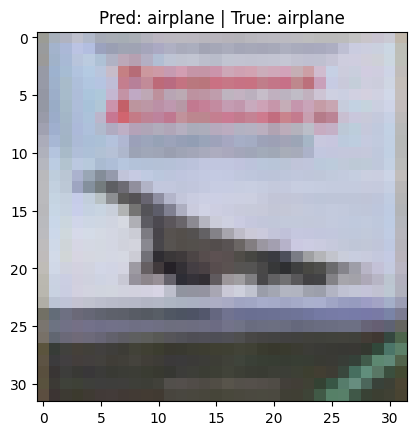

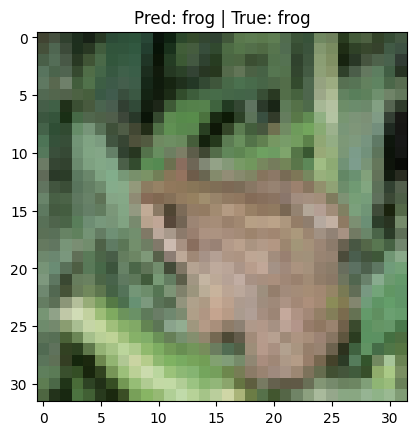

In [20]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[np.argmax(y_pred[i])]} | True: {class_names[np.argmax(Y_test[i])]}")
    plt.show()
